## U.S. Store Performance Report - Abhishek Dasgupta ##

**Data Preparation**

In [1]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


- Importing Employees and Orders data frames 

In [2]:
#Import employees and orders Excel files into two data frames (5 pts) 
import pandas as pd
pathEmployees = 'Employees.xlsx'
pathOrders = 'Orders.xlsx'
employeesData = pd.read_excel(pathEmployees)
ordersData = pd.read_excel(pathOrders)

/opt/conda/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


- Merging the two data frames

In [3]:
#Merge the two data frames using the EmployeeID (10 pts) 
emporderData = pd.merge(employeesData, ordersData, left_on='EmployeeID', right_on='EmployeeID', how='left')
emporderData

,EmployeeID,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City_x,PostalCode,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Unnamed: 22
0,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.,Seattle,98122,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820,NaN
1,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.,Seattle,98122,...,Central,OFF-ST-10004186,Office Supplies,Storage,"Stur-D-Stor Shelving, Vertical 5-Shelf: 72""H x...",665.880,6,0.0,13.3176,NaN
2,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.,Seattle,98122,...,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,3,0.2,16.0110,NaN
3,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.,Seattle,98122,...,West,OFF-BI-10002215,Office Supplies,Binders,"Wilson Jones Hanging View Binder, White, 1""",22.720,4,0.2,7.3840,NaN
4,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.,Seattle,98122,...,Central,OFF-AR-10000246,Office Supplies,Art,Newell 318,19.460,7,0.0,5.0596,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9,Dodsworth,Anne,Sales Representative,Ms.,1966-01-27,1994-11-15,7 Houndstooth Rd.,London,WG2 7LT,...,Central,FUR-CH-10003379,Furniture,Chairs,Global Commerce Series High-Back Swivel/Tilt C...,797.944,4,0.3,-56.9960,NaN
9990,9,Dodsworth,Anne,Sales Representative,Ms.,1966-01-27,1994-11-15,7 Houndstooth Rd.,London,WG2 7LT,...,East,OFF-AP-10000595,Office Supplies,Appliances,Disposable Triple-Filter Dust Bags,13.110,3,0.0,3.4086,NaN
9991,9,Dodsworth,Anne,Sales Representative,Ms.,1966-01-27,1994-11-15,7 Houndstooth Rd.,London,WG2 7LT,...,East,OFF-BI-10000494,Office Supplies,Binders,Acco Economy Flexible Poly Round Ring Binder,3.132,2,0.7,-2.6100,NaN
9992,9,Dodsworth,Anne,Sales Representative,Ms.,1966-01-27,1994-11-15,7 Houndstooth Rd.,London,WG2 7LT,...,East,OFF-AR-10002467,Office Supplies,Art,Dixon Ticonderoga Pencils,8.940,3,0.0,2.4138,NaN


In [4]:
#After merging the data frames, reset the index 
emporderData = emporderData.reset_index(drop=True)
emporderData.head(1)

,EmployeeID,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City_x,PostalCode,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Unnamed: 22
0,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.,Seattle,98122,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.582,NaN


- Checking and correcting data types

In [5]:
#Ensure that the data type of each column is correct. None of the columns should have a data type Object. 
#For example, if the column contains dates and times, then you should make sure the data type of that column is date/time (10 pts). 
emporderData.dtypes

EmployeeID                  int64
LastName                   object
FirstName                  object
Title                      object
TitleOfCourtesy            object
BirthDate          datetime64[ns]
HireDate           datetime64[ns]
Address                    object
City_x                     object
PostalCode                 object
Country_x                  object
HomePhone                  object
Extension                   int64
Row ID                      int64
Order ID                   object
Order Date         datetime64[ns]
Ship Date          datetime64[ns]
Ship Mode                  object
Customer ID                object
Customer Name              object
Segment                    object
Country_y                  object
City_y                     object
State                      object
Postal Code               float64
Region                     object
Product ID                 object
Category                   object
Sub-Category               object
Product Name  

In [6]:
#Fix column data types
emporderData.LastName = emporderData.LastName.astype('string')
emporderData.FirstName = emporderData.FirstName.astype('string')
emporderData.Title = emporderData.Title.astype('string')
emporderData.TitleOfCourtesy = emporderData.TitleOfCourtesy.astype('string')
emporderData.Address = emporderData.Address.astype('string')
emporderData.City_x = emporderData.City_x.astype('string')
emporderData.PostalCode = emporderData.PostalCode.astype('string')
emporderData.HomePhone = emporderData.HomePhone.astype('string')
emporderData['Order ID'] = emporderData['Order ID'].astype('string')
emporderData['Ship Mode']  = emporderData['Ship Mode'].astype('string')
emporderData['Customer ID']  = emporderData['Customer ID'].astype('string')
emporderData['Customer Name']  = emporderData['Customer Name'].astype('string')
emporderData.Segment  = emporderData.Segment.astype('string')
emporderData.Country_y  = emporderData.Country_y.astype('string')
emporderData.City_y  = emporderData.City_y.astype('string')
emporderData.State  = emporderData.State.astype('string')
emporderData.Region  = emporderData.Region.astype('string')
emporderData['Product ID']  = emporderData['Product ID'].astype('string')
emporderData.Category  = emporderData.Category.astype('string')
emporderData['Sub-Category']  = emporderData['Sub-Category'].astype('string')
emporderData['Product Name']  = emporderData['Product Name'].astype('string')
emporderData.dtypes

EmployeeID                  int64
LastName                   string
FirstName                  string
Title                      string
TitleOfCourtesy            string
BirthDate          datetime64[ns]
HireDate           datetime64[ns]
Address                    string
City_x                     string
PostalCode                 string
Country_x                  object
HomePhone                  string
Extension                   int64
Row ID                      int64
Order ID                   string
Order Date         datetime64[ns]
Ship Date          datetime64[ns]
Ship Mode                  string
Customer ID                string
Customer Name              string
Segment                    string
Country_y                  string
City_y                     string
State                      string
Postal Code               float64
Region                     string
Product ID                 string
Category                   string
Sub-Category               string
Product Name  

- Checking and cleaning missing values

In [7]:
#Check for missing values (5 pts). If there are missing values, suggest a way to deal with them. 
emporderData.isna()

,EmployeeID,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City_x,PostalCode,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Unnamed: 22
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9990,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9991,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9992,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [8]:
#Check for columns with missing values
emporderData[emporderData.columns[emporderData.isna().any()]]

,Postal Code,Unnamed: 22
0,42420.0,NaN
1,53711.0,NaN
2,94109.0,NaN
3,94109.0,NaN
4,68025.0,NaN
...,...,...
9989,60653.0,NaN
9990,10009.0,NaN
9991,45040.0,NaN
9992,8701.0,NaN


*Should remove "Unnamed" column. Missing Postal Codes can be filled using Postal Codes from other data.*

In [9]:
#Clean empty columns
emporderData.dropna(how='all', axis='columns')

,EmployeeID,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City_x,PostalCode,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.,Seattle,98122,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820
1,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.,Seattle,98122,...,53711.0,Central,OFF-ST-10004186,Office Supplies,Storage,"Stur-D-Stor Shelving, Vertical 5-Shelf: 72""H x...",665.880,6,0.0,13.3176
2,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.,Seattle,98122,...,94109.0,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,3,0.2,16.0110
3,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.,Seattle,98122,...,94109.0,West,OFF-BI-10002215,Office Supplies,Binders,"Wilson Jones Hanging View Binder, White, 1""",22.720,4,0.2,7.3840
4,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.,Seattle,98122,...,68025.0,Central,OFF-AR-10000246,Office Supplies,Art,Newell 318,19.460,7,0.0,5.0596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9,Dodsworth,Anne,Sales Representative,Ms.,1966-01-27,1994-11-15,7 Houndstooth Rd.,London,WG2 7LT,...,60653.0,Central,FUR-CH-10003379,Furniture,Chairs,Global Commerce Series High-Back Swivel/Tilt C...,797.944,4,0.3,-56.9960
9990,9,Dodsworth,Anne,Sales Representative,Ms.,1966-01-27,1994-11-15,7 Houndstooth Rd.,London,WG2 7LT,...,10009.0,East,OFF-AP-10000595,Office Supplies,Appliances,Disposable Triple-Filter Dust Bags,13.110,3,0.0,3.4086
9991,9,Dodsworth,Anne,Sales Representative,Ms.,1966-01-27,1994-11-15,7 Houndstooth Rd.,London,WG2 7LT,...,45040.0,East,OFF-BI-10000494,Office Supplies,Binders,Acco Economy Flexible Poly Round Ring Binder,3.132,2,0.7,-2.6100
9992,9,Dodsworth,Anne,Sales Representative,Ms.,1966-01-27,1994-11-15,7 Houndstooth Rd.,London,WG2 7LT,...,8701.0,East,OFF-AR-10002467,Office Supplies,Art,Dixon Ticonderoga Pencils,8.940,3,0.0,2.4138


- Filter Duplicates

In [10]:
#Remove duplicate rows if there are any (5 pts). 
#Check for duplicates
emporderData.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9994, dtype: bool

*No Duplicates Found*

- Descriptive Information

In [11]:
#Calculate the number of days to ship an order (5 pts) 
#The formula is as follow: Number of days to ship = Ship date – Order date 
emporderData['Ship Date'] - emporderData['Order Date']

0      3 days
1      7 days
2      5 days
3      5 days
4      4 days
        ...  
9989   4 days
9990   2 days
9991   2 days
9992   1 days
9993   2 days
Length: 9994, dtype: timedelta64[ns]

*This is the number of days each shipment took to arrive after the order date.*

In [12]:
#Provide descriptive (e.g., mean, min, max, standard deviation, count, etc.) 
#of all numeric columns (i.e., Sales, Profits, Quantity, and Discount) of the data (10 pts)
emporderData.describe()

,EmployeeID,Extension,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Unnamed: 22
count,9994.000000,9994.000000,9994.000000,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000,0.0
mean,4.873224,2731.855513,4997.500000,55245.233297,229.858001,3.789574,0.156203,28.656896,NaN
std,2.448598,1827.818526,2885.163629,32038.715955,623.245101,2.225110,0.206452,234.260108,NaN
min,1.000000,428.000000,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,NaN
25%,3.000000,465.000000,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750,NaN
50%,5.000000,3355.000000,4997.500000,57103.000000,54.490000,3.000000,0.200000,8.666500,NaN
75%,7.000000,3457.000000,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000,NaN
max,9.000000,5467.000000,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000,NaN


*Descriptive data regarding all columns of numerical values.*

In [13]:
#Provide the correlation matrix (10 pts) 
emporderData.corr()

,EmployeeID,Extension,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Unnamed: 22
EmployeeID,1.000000,-0.776469,-0.015789,0.006246,0.009108,0.002101,0.001451,0.009570,NaN
Extension,-0.776469,1.000000,0.018803,-0.005357,-0.005100,-0.000232,0.003048,-0.006775,NaN
Row ID,-0.015789,0.018803,1.000000,0.011644,-0.001359,-0.004016,0.013480,0.012497,NaN
Postal Code,0.006246,-0.005357,0.011644,1.000000,-0.022346,0.013376,0.057243,-0.028751,NaN
Sales,0.009108,-0.005100,-0.001359,-0.022346,1.000000,0.200795,-0.028190,0.479064,NaN
Quantity,0.002101,-0.000232,-0.004016,0.013376,0.200795,1.000000,0.008623,0.066253,NaN
Discount,0.001451,0.003048,0.013480,0.057243,-0.028190,0.008623,1.000000,-0.219487,NaN
Profit,0.009570,-0.006775,0.012497,-0.028751,0.479064,0.066253,-0.219487,1.000000,NaN
Unnamed: 22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*This is the correlation matrix for these values*

In [14]:
#Assume that an outlier is a value that is above (mean + 3*standard deviation). Find all the outliers 
print('If an outlier is a value that is above (mean + 3* standard deviation)')
#Based on Quantity (5 pts) 
print('Quantity: ' + str(3.789574 + 3*2.225110))
#Based on Sales (5 pts) 
print('Sales: ' + str(229.858001 + 3*623.245101))
#Based on Profits (5 pts) 
print('Profit: ' + str(28.656896 + 3*234.260108))

If an outlier is a value that is above (mean + 3* standard deviation)
Quantity: 10.464904
Sales: 2099.593304
Profit: 731.43722


*These are the values I will use to find the respective outliers*

In [15]:
import numpy as np
emporderData[(np.abs(emporderData.Quantity.to_frame()) > 10.464904).any(1)]

,EmployeeID,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City_x,PostalCode,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Unnamed: 22
17,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.,Seattle,98122,...,East,OFF-FA-10000621,Office Supplies,Fasteners,"OIC Colored Binder Clips, Assorted Sizes",40.096,14,0.2,14.5348,NaN
21,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.,Seattle,98122,...,Central,TEC-PH-10000215,Technology,Phones,Plantronics Cordless Phone Headset with In-lin...,384.450,11,0.0,103.8015,NaN
152,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.,Seattle,98122,...,West,OFF-LA-10003510,Office Supplies,Labels,Avery 4027 File Folder Labels for Dot Matrix P...,427.420,14,0.0,196.6132,NaN
177,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.,Seattle,98122,...,East,FUR-FU-10001290,Furniture,Furnishings,Executive Impressions Supervisor Wall Clock,547.300,13,0.0,175.1360,NaN
278,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.,Seattle,98122,...,East,OFF-FA-10002975,Office Supplies,Fasteners,Staples,39.312,13,0.2,12.7764,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9646,9,Dodsworth,Anne,Sales Representative,Ms.,1966-01-27,1994-11-15,7 Houndstooth Rd.,London,WG2 7LT,...,East,OFF-PA-10002137,Office Supplies,Paper,"Southworth 100% Résumé Paper, 24lb.",108.920,14,0.0,49.0140,NaN
9716,9,Dodsworth,Anne,Sales Representative,Ms.,1966-01-27,1994-11-15,7 Houndstooth Rd.,London,WG2 7LT,...,West,OFF-BI-10001718,Office Supplies,Binders,GBC DocuBind P50 Personal Binding Machine,563.024,11,0.2,190.0206,NaN
9897,9,Dodsworth,Anne,Sales Representative,Ms.,1966-01-27,1994-11-15,7 Houndstooth Rd.,London,WG2 7LT,...,South,OFF-PA-10001569,Office Supplies,Paper,Xerox 232,71.280,11,0.0,34.2144,NaN
9916,9,Dodsworth,Anne,Sales Representative,Ms.,1966-01-27,1994-11-15,7 Houndstooth Rd.,London,WG2 7LT,...,Central,OFF-BI-10000343,Office Supplies,Binders,"Pressboard Covers with Storage Hooks, 9 1/2"" x...",13.748,14,0.8,-22.6842,NaN


*Outliers based on Quantity*

In [16]:
emporderData[(np.abs(emporderData.Sales.to_frame()) > 2099.593304).any(1)]

,EmployeeID,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City_x,PostalCode,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Unnamed: 22
33,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.,Seattle,98122,...,Central,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,3059.982,3,0.4,-509.9970,NaN
48,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.,Seattle,98122,...,Central,TEC-PH-10001363,Technology,Phones,Apple iPhone 5S,2735.952,6,0.2,341.9940,NaN
51,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.,Seattle,98122,...,West,TEC-CO-10003236,Technology,Copiers,Canon Image Class D660 Copier,2999.950,5,0.0,1379.9770,NaN
105,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.,Seattle,98122,...,South,OFF-BI-10003925,Office Supplies,Binders,Fellowes PB300 Plastic Comb Binding Machine,2715.930,7,0.0,1276.4871,NaN
116,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.,Seattle,98122,...,East,TEC-MA-10003979,Technology,Machines,Ativa V4110MDD Micro-Cut Shredder,4899.930,7,0.0,2400.9657,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9684,9,Dodsworth,Anne,Sales Representative,Ms.,1966-01-27,1994-11-15,7 Houndstooth Rd.,London,WG2 7LT,...,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856,NaN
9719,9,Dodsworth,Anne,Sales Representative,Ms.,1966-01-27,1994-11-15,7 Houndstooth Rd.,London,WG2 7LT,...,South,TEC-AC-10004145,Technology,Accessories,Logitech diNovo Edge Keyboard,2249.910,9,0.0,517.4793,NaN
9758,9,Dodsworth,Anne,Sales Representative,Ms.,1966-01-27,1994-11-15,7 Houndstooth Rd.,London,WG2 7LT,...,South,TEC-CO-10001449,Technology,Copiers,Hewlett Packard LaserJet 3310 Copier,2999.950,5,0.0,1439.9760,NaN
9889,9,Dodsworth,Anne,Sales Representative,Ms.,1966-01-27,1994-11-15,7 Houndstooth Rd.,London,WG2 7LT,...,East,OFF-AP-10000275,Office Supplies,Appliances,Sanyo Counter Height Refrigerator with Crisper...,2625.120,8,0.0,735.0336,NaN


*Outliers based on Sales*

In [17]:
emporderData[(np.abs(emporderData.Profit.to_frame()) > 731.43722).any(1)]

,EmployeeID,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City_x,PostalCode,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Unnamed: 22
51,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.,Seattle,98122,...,West,TEC-CO-10003236,Technology,Copiers,Canon Image Class D660 Copier,2999.950,5,0.0,1379.9770,NaN
105,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.,Seattle,98122,...,South,OFF-BI-10003925,Office Supplies,Binders,Fellowes PB300 Plastic Comb Binding Machine,2715.930,7,0.0,1276.4871,NaN
116,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.,Seattle,98122,...,East,TEC-MA-10003979,Technology,Machines,Ativa V4110MDD Micro-Cut Shredder,4899.930,7,0.0,2400.9657,NaN
124,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.,Seattle,98122,...,Central,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,1088.792,4,0.8,-1850.9464,NaN
538,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.,Seattle,98122,...,East,OFF-BI-10001359,Office Supplies,Binders,GBC DocuBind TL300 Electric Binding System,1793.980,2,0.0,843.1706,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9684,9,Dodsworth,Anne,Sales Representative,Ms.,1966-01-27,1994-11-15,7 Houndstooth Rd.,London,WG2 7LT,...,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856,NaN
9758,9,Dodsworth,Anne,Sales Representative,Ms.,1966-01-27,1994-11-15,7 Houndstooth Rd.,London,WG2 7LT,...,South,TEC-CO-10001449,Technology,Copiers,Hewlett Packard LaserJet 3310 Copier,2999.950,5,0.0,1439.9760,NaN
9820,9,Dodsworth,Anne,Sales Representative,Ms.,1966-01-27,1994-11-15,7 Houndstooth Rd.,London,WG2 7LT,...,East,TEC-CO-10002095,Technology,Copiers,Hewlett Packard 610 Color Digital Copier / Pri...,1999.960,4,0.0,899.9820,NaN
9889,9,Dodsworth,Anne,Sales Representative,Ms.,1966-01-27,1994-11-15,7 Houndstooth Rd.,London,WG2 7LT,...,East,OFF-AP-10000275,Office Supplies,Appliances,Sanyo Counter Height Refrigerator with Crisper...,2625.120,8,0.0,735.0336,NaN


*Outliers based on Profit*

**Data Exploration**

- Average and total sales per state

In [18]:
#Average sales per state
emporderData = emporderData.set_index('State')
emporderData.mean(level='State').sort_values(by=['Sales'], ascending=False)

,EmployeeID,Extension,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Unnamed: 22
State,,,,,,,,,
Wyoming,5.000000,3453.000000,5870.000000,82001.000000,1603.136000,4.000000,0.200000,100.196000,NaN
Vermont,5.545455,2296.090909,8277.181818,NaN,811.760909,4.545455,0.000000,204.088936,NaN
Nevada,5.564103,2026.666667,5731.948718,89136.846154,428.951333,4.307692,0.061538,85.045279,NaN
Rhode Island,5.196429,2756.267857,5453.303571,2908.535714,404.070643,3.553571,0.021429,130.100523,NaN
Montana,5.066667,2219.000000,4095.866667,59491.733333,372.623467,3.733333,0.066667,122.221900,NaN
Indiana,4.825503,2956.463087,4891.073826,46923.503356,359.431946,3.879195,0.000000,123.375411,NaN
Missouri,5.196970,2435.287879,4927.969697,65126.696970,336.441667,3.818182,0.000000,97.518341,NaN
Minnesota,4.988764,2794.617978,3557.808989,55418.247191,335.541011,3.719101,0.000000,121.608847,NaN
Alabama,5.049180,2480.655738,3997.967213,35994.573770,319.846557,4.196721,0.000000,94.865989,NaN


*The state with the highest average sales is Wyoming*

In [19]:
#Total sales per state
emporderData.sum(level='State').sort_values(by=['Sales'], ascending=False)

,EmployeeID,Extension,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Unnamed: 22
State,,,,,,,,,
California,9703,5468657,10137449,184382639.0,457687.6315,7667,145.60,76381.3871,0.0
New York,5543,3007767,5452096,11835721.0,310876.2710,4224,62.40,74038.5486,0.0
Texas,4928,2604054,5085541,75747693.0,170188.0458,3724,364.64,-25729.3563,0.0
Washington,2520,1371556,2584458,49661687.0,138641.2700,1883,32.40,33402.6517,0.0
Pennsylvania,2868,1652234,2768523,11190565.0,116511.9140,2153,192.90,-15559.9603,0.0
Florida,1771,1132546,1958255,12640225.0,89473.7080,1379,114.65,-3399.3017,0.0
Illinois,2318,1431493,2571481,29873772.0,80166.1010,1845,191.90,-12607.8870,0.0
Ohio,2277,1236671,2355994,20579836.0,78258.1360,1759,152.40,-16971.3766,0.0
Michigan,1219,713213,1200167,12356103.0,76269.6140,946,1.80,24463.1876,0.0


*The state with the highest total sales is California*

- Average and total profits per state

In [20]:
#Average profits per state
emporderData.mean(level='State').sort_values(by=['Profit'], ascending=False)

,EmployeeID,Extension,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Unnamed: 22
State,,,,,,,,,
Vermont,5.545455,2296.090909,8277.181818,NaN,811.760909,4.545455,0.000000,204.088936,NaN
Rhode Island,5.196429,2756.267857,5453.303571,2908.535714,404.070643,3.553571,0.021429,130.100523,NaN
Indiana,4.825503,2956.463087,4891.073826,46923.503356,359.431946,3.879195,0.000000,123.375411,NaN
Montana,5.066667,2219.000000,4095.866667,59491.733333,372.623467,3.733333,0.066667,122.221900,NaN
Minnesota,4.988764,2794.617978,3557.808989,55418.247191,335.541011,3.719101,0.000000,121.608847,NaN
District of Columbia,4.000000,3322.400000,1791.800000,20016.000000,286.502000,4.000000,0.000000,105.958930,NaN
Delaware,4.781250,2888.843750,5253.854167,19755.250000,285.948635,3.822917,0.006250,103.930988,NaN
Wyoming,5.000000,3453.000000,5870.000000,82001.000000,1603.136000,4.000000,0.200000,100.196000,NaN
Missouri,5.196970,2435.287879,4927.969697,65126.696970,336.441667,3.818182,0.000000,97.518341,NaN


*The state with the highest average profits is Vermont*

In [21]:
#Total profits per state
emporderData.sum(level='State').sort_values(by=['Profit'], ascending=False)

,EmployeeID,Extension,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Unnamed: 22
State,,,,,,,,,
California,9703,5468657,10137449,184382639.0,457687.6315,7667,145.60,76381.3871,0.0
New York,5543,3007767,5452096,11835721.0,310876.2710,4224,62.40,74038.5486,0.0
Washington,2520,1371556,2584458,49661687.0,138641.2700,1883,32.40,33402.6517,0.0
Michigan,1219,713213,1200167,12356103.0,76269.6140,946,1.80,24463.1876,0.0
Virginia,1062,601248,1218137,5124335.0,70636.7200,893,0.00,18597.9504,0.0
Indiana,719,440513,728770,6991602.0,53555.3600,578,0.00,18382.9363,0.0
Georgia,883,507915,883590,5685480.0,49095.8400,705,0.00,16250.0433,0.0
Kentucky,634,395183,698921,5725336.0,36591.7500,523,0.00,11199.6966,0.0
Minnesota,444,248721,316645,4932224.0,29863.1500,331,0.00,10823.1874,0.0


*The state with the highest total profits is California*

- Average and total sales per Sub-Category

In [22]:
#reset index to Sub-Category
emporderData = emporderData.reset_index()
emporderData = emporderData.set_index('Sub-Category')

In [23]:
#Average sales per Sub-Category
emporderData.mean(level='Sub-Category').sort_values(by=['Sales'], ascending=False)

,EmployeeID,Extension,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Unnamed: 22
Sub-Category,,,,,,,,,
Copiers,5.205882,2665.544118,5230.308824,56962.897059,2198.941618,3.441176,0.161765,817.909190,NaN
Machines,5.121739,2700.826087,4881.982609,55344.939130,1645.553313,3.826087,0.306087,29.432669,NaN
Tables,4.686520,2774.100313,4929.981191,58331.749216,648.794771,3.890282,0.261285,-55.565771,NaN
Chairs,4.949757,2711.181524,5059.162075,56705.878247,532.332420,3.818476,0.170178,43.095894,NaN
Bookcases,4.609649,2831.289474,5072.521930,56238.462555,503.859633,3.807018,0.211140,-15.230509,NaN
Phones,4.913386,2762.323960,4944.865017,53932.170045,371.211534,3.699663,0.154556,50.073938,NaN
Storage,4.991726,2633.290780,4877.835697,54725.813018,264.590553,3.732861,0.074704,25.152277,NaN
Supplies,4.868421,2752.089474,5229.231579,55966.094737,245.650200,3.405263,0.076842,-6.258418,NaN
Appliances,4.603004,2922.944206,5166.854077,54290.602151,230.755710,3.710300,0.166524,38.922758,NaN


*The sub-category with the highest average sales is Copiers*

In [24]:
#Total sales per Sub-Category
emporderData.sum(level='Sub-Category').sort_values(by=['Sales'], ascending=False)

,EmployeeID,Extension,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Unnamed: 22
Sub-Category,,,,,,,,,
Phones,4368,2455706,4395985,47891767.0,330007.0540,3289,137.40,44515.7306,0.0
Chairs,3054,1672799,3121503,34930821.0,328449.1030,2356,105.00,26590.1663,0.0
Storage,4223,2227764,4126649,46243312.0,223843.6080,3158,63.20,21278.8264,0.0
Tables,1495,884938,1572664,18607828.0,206965.5320,1241,83.35,-17725.4811,0.0
Binders,7431,4103922,7633935,83626398.0,203412.7330,5974,567.00,30221.7633,0.0
Machines,589,310595,561428,6364668.0,189238.6310,440,35.20,3384.7569,0.0
Accessories,3848,2071737,3928080,44457618.0,167380.3180,2976,60.80,41936.6357,0.0
Copiers,354,181257,355661,3873477.0,149528.0300,234,11.00,55617.8249,0.0
Bookcases,1051,645534,1156535,12766131.0,114879.9963,868,48.14,-3472.5560,0.0


*The sub-category with the highest total sales is Phones*

- Average and total profits per sub-category

In [25]:
#Average profits per sub-category
emporderData.mean(level='Sub-Category').sort_values(by=['Profit'], ascending=False)

,EmployeeID,Extension,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Unnamed: 22
Sub-Category,,,,,,,,,
Copiers,5.205882,2665.544118,5230.308824,56962.897059,2198.941618,3.441176,0.161765,817.909190,NaN
Accessories,4.965161,2673.209032,5068.490323,57513.089263,215.974604,3.840000,0.078452,54.111788,NaN
Phones,4.913386,2762.323960,4944.865017,53932.170045,371.211534,3.699663,0.154556,50.073938,NaN
Chairs,4.949757,2711.181524,5059.162075,56705.878247,532.332420,3.818476,0.170178,43.095894,NaN
Appliances,4.603004,2922.944206,5166.854077,54290.602151,230.755710,3.710300,0.166524,38.922758,NaN
Machines,5.121739,2700.826087,4881.982609,55344.939130,1645.553313,3.826087,0.306087,29.432669,NaN
Envelopes,5.275591,2473.598425,4755.523622,52649.498024,64.867724,3.566929,0.080315,27.418019,NaN
Storage,4.991726,2633.290780,4877.835697,54725.813018,264.590553,3.732861,0.074704,25.152277,NaN
Paper,4.831387,2742.733577,5026.343066,55766.377924,57.284092,3.779562,0.074891,24.856620,NaN


*The sub-category with the highest average profits is Copiers*

In [26]:
#Total profits per sub-category
emporderData.sum(level='Sub-Category').sort_values(by=['Profit'], ascending=False)

,EmployeeID,Extension,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Unnamed: 22
Sub-Category,,,,,,,,,
Copiers,354,181257,355661,3873477.0,149528.0300,234,11.00,55617.8249,0.0
Phones,4368,2455706,4395985,47891767.0,330007.0540,3289,137.40,44515.7306,0.0
Accessories,3848,2071737,3928080,44457618.0,167380.3180,2976,60.80,41936.6357,0.0
Paper,6619,3757545,6886090,76288405.0,78479.2060,5178,102.60,34053.5693,0.0
Binders,7431,4103922,7633935,83626398.0,203412.7330,5974,567.00,30221.7633,0.0
Chairs,3054,1672799,3121503,34930821.0,328449.1030,2356,105.00,26590.1663,0.0
Storage,4223,2227764,4126649,46243312.0,223843.6080,3158,63.20,21278.8264,0.0
Appliances,2145,1362092,2407754,25245130.0,107532.1610,1729,77.60,18138.0054,0.0
Furnishings,4689,2591450,4842624,51880430.0,91705.1640,3563,132.40,13059.1436,0.0


*The sub-category with the highest total profits is Copiers*

- Number of orders per employee

In [41]:
emporderData = emporderData.reset_index()
emporderData.head(1)

,index,Sub-Category,State,EmployeeID,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,...,Postal Code,Region,Product ID,Category,Product Name,Sales,Quantity,Discount,Profit,Unnamed: 22
0,0,Chairs,Kentucky,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,...,42420.0,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.582,NaN


In [42]:
#Count how many times employee names show up in dataframe
emporderData.groupby(['LastName','FirstName']).count()

,,index,Sub-Category,State,EmployeeID,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City_x,...,Postal Code,Region,Product ID,Category,Product Name,Sales,Quantity,Discount,Profit,Unnamed: 22
LastName,FirstName,,,,,,,,,,,,,,,,,,,,,
Buchanan,Steven,1142,1142,1142,1142,1142,1142,1142,1142,1142,1142,...,1141,1142,1142,1142,1142,1142,1142,1142,1142,0
Callahan,Laura,1112,1112,1112,1112,1112,1112,1112,1112,1112,1112,...,1110,1112,1112,1112,1112,1112,1112,1112,1112,0
Davolio,Nancy,1084,1084,1084,1084,1084,1084,1084,1084,1084,1084,...,1084,1084,1084,1084,1084,1084,1084,1084,1084,0
Dodsworth,Anne,554,554,554,554,554,554,554,554,554,554,...,553,554,554,554,554,554,554,554,554,0
Fuller,Andrew,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185,...,1184,1185,1185,1185,1185,1185,1185,1185,1185,0
King,Robert,1638,1638,1638,1638,1638,1638,1638,1638,1638,1638,...,1637,1638,1638,1638,1638,1638,1638,1638,1638,0
Leverling,Janet,1121,1121,1121,1121,1121,1121,1121,1121,1121,1121,...,1119,1121,1121,1121,1121,1121,1121,1121,1121,0
Peacock,Margaret,1060,1060,1060,1060,1060,1060,1060,1060,1060,1060,...,1059,1060,1060,1060,1060,1060,1060,1060,1060,0
Suyama,Michael,1098,1098,1098,1098,1098,1098,1098,1098,1098,1098,...,1096,1098,1098,1098,1098,1098,1098,1098,1098,0


*The employee with the highest number of orders is Robert King*

- Average number of days to ship an order per state

In [58]:
#Create new column for shipping time
shippingtime = emporderData['Ship Date'] - emporderData['Order Date']
emporderData['Shipping Time'] = shippingtime.dt.days
emporderData.head(1)

,level_0,index,Sub-Category,EmployeeID,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,...,Region,Product ID,Category,Product Name,Sales,Quantity,Discount,Profit,Unnamed: 22,Shipping Time
State,,,,,,,,,,,,,,,,,,,,,
Kentucky,0,0,Chairs,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,...,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.582,NaN,3


In [59]:
#reset index
emporderData = emporderData.reset_index()
emporderData = emporderData.set_index('State')
emporderData.head(1)

,level_0,index,Sub-Category,EmployeeID,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,...,Region,Product ID,Category,Product Name,Sales,Quantity,Discount,Profit,Unnamed: 22,Shipping Time
State,,,,,,,,,,,,,,,,,,,,,
Kentucky,0,0,Chairs,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,...,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.582,NaN,3


In [62]:
#Average number of shipping days per state
emporderData.mean(level='State').sort_values(by=['Shipping Time'], ascending=True)

,level_0,index,EmployeeID,Extension,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Unnamed: 22,Shipping Time
State,,,,,,,,,,,,
North Dakota,6333.428571,6333.428571,6.000000,1862.428571,5256.571429,58103.000000,131.415714,4.285714,0.000000,32.878529,NaN,2.857143
West Virginia,6999.750000,6999.750000,6.250000,1202.750000,8293.750000,26003.000000,302.456000,4.500000,0.075000,46.480400,NaN,3.000000
Louisiana,4623.214286,4623.214286,4.642857,2609.785714,4133.928571,70777.357143,219.453095,3.714286,0.000000,52.288150,NaN,3.047619
Rhode Island,5419.875000,5419.875000,5.196429,2756.267857,5453.303571,2908.535714,404.070643,3.553571,0.021429,130.100523,NaN,3.285714
Ohio,4968.326226,4968.326226,4.855011,2636.825160,5023.441365,43880.247335,166.861697,3.750533,0.324947,-36.186304,NaN,3.454158
Nebraska,4711.552632,4711.552632,4.578947,3145.973684,5404.842105,68121.421053,196.445526,3.578947,0.000000,53.607742,NaN,3.500000
South Carolina,5998.119048,5998.119048,5.761905,2128.547619,4621.309524,29287.333333,201.945476,4.095238,0.000000,42.120395,NaN,3.595238
Connecticut,5384.317073,5384.317073,5.170732,2669.109756,5419.646341,6475.670732,163.223866,3.426829,0.007317,42.823071,NaN,3.597561
Idaho,4516.095238,4516.095238,4.380952,2963.238095,6163.190476,83462.333333,208.689810,3.047619,0.085714,39.367767,NaN,3.666667


*The state that has the lowest average number of days to ship an order is North Dakota*

- Average and total sales per order date (in years)

In [64]:
#Create new column for year of order date
yearofOrderDate = emporderData['Order Date'].dt.year
emporderData['Year of Order Date'] = yearofOrderDate
emporderData.head(1)

,level_0,index,Sub-Category,EmployeeID,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,...,Product ID,Category,Product Name,Sales,Quantity,Discount,Profit,Unnamed: 22,Shipping Time,Year of Order Date
State,,,,,,,,,,,,,,,,,,,,,
Kentucky,0,0,Chairs,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,...,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.582,NaN,3,2017


In [67]:
#set index to year of order date
emporderData = emporderData.reset_index()
emporderData = emporderData.set_index('Year of Order Date')
emporderData.head(1)

,State,level_0,index,Sub-Category,EmployeeID,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,...,Region,Product ID,Category,Product Name,Sales,Quantity,Discount,Profit,Unnamed: 22,Shipping Time
Year of Order Date,,,,,,,,,,,,,,,,,,,,,
2017,Kentucky,0,0,Chairs,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,...,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.582,NaN,3


In [68]:
#Which year has the highest average sales? 
emporderData.mean(level='Year of Order Date').sort_values(by=['Sales'], ascending=False)

,level_0,index,EmployeeID,Extension,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Unnamed: 22,Shipping Time
Year of Order Date,,,,,,,,,,,,
2015,5012.375314,5012.375314,4.890115,2698.725038,4969.400401,56834.544405,242.974159,3.803813,0.158284,24.858994,NaN,3.996989
2017,4949.692694,4949.692694,4.836490,2762.759181,4939.622729,54580.638018,235.487282,3.802474,0.154743,31.617771,NaN,3.948976
2016,5059.335871,5059.335871,4.931494,2711.345385,4954.184586,52951.157619,223.849909,3.795909,0.155609,29.314274,NaN,4.017127
2018,4983.628623,4983.628623,4.854771,2740.669988,5087.107488,56263.289386,221.381418,3.766908,0.156467,28.212340,NaN,3.905495


*The year with the highest average sales is 2015*

In [69]:
#Which year has the highest total sales? 
emporderData.sum(level='Year of Order Date').sort_values(by=['Sales'], ascending=False)

,level_0,index,EmployeeID,Extension,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Unnamed: 22,Shipping Time
Year of Order Date,,,,,,,,,,,,
2018,16505778,16505778,16079,9077099,16848500,186062698.0,733215.2552,12476,518.22,93439.2696,0.0,12935
2017,12804855,12804855,12512,7147258,12778804,140981788.0,609205.5980,9837,400.32,81795.1743,0.0,10216
2015,9989664,9989664,9746,5378559,9904015,113271247.0,484247.4981,7581,315.46,49543.9741,0.0,7966
2016,10634724,10634724,10366,5699248,10413696,111197431.0,470532.5090,7979,327.09,61618.6037,0.0,8444


*The year with the highest total sales is 2018*

- Average and total profits per order date

In [70]:
#Which year has the highest average profits? 
emporderData.mean(level='Year of Order Date').sort_values(by=['Profit'], ascending=False)

,level_0,index,EmployeeID,Extension,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Unnamed: 22,Shipping Time
Year of Order Date,,,,,,,,,,,,
2017,4949.692694,4949.692694,4.836490,2762.759181,4939.622729,54580.638018,235.487282,3.802474,0.154743,31.617771,NaN,3.948976
2016,5059.335871,5059.335871,4.931494,2711.345385,4954.184586,52951.157619,223.849909,3.795909,0.155609,29.314274,NaN,4.017127
2018,4983.628623,4983.628623,4.854771,2740.669988,5087.107488,56263.289386,221.381418,3.766908,0.156467,28.212340,NaN,3.905495
2015,5012.375314,5012.375314,4.890115,2698.725038,4969.400401,56834.544405,242.974159,3.803813,0.158284,24.858994,NaN,3.996989


*The year with the highest average profits is 2017*

In [71]:
#Which year has the highest total profits? 
emporderData.sum(level='Year of Order Date').sort_values(by=['Profit'], ascending=False)

,level_0,index,EmployeeID,Extension,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Unnamed: 22,Shipping Time
Year of Order Date,,,,,,,,,,,,
2018,16505778,16505778,16079,9077099,16848500,186062698.0,733215.2552,12476,518.22,93439.2696,0.0,12935
2017,12804855,12804855,12512,7147258,12778804,140981788.0,609205.5980,9837,400.32,81795.1743,0.0,10216
2016,10634724,10634724,10366,5699248,10413696,111197431.0,470532.5090,7979,327.09,61618.6037,0.0,8444
2015,9989664,9989664,9746,5378559,9904015,113271247.0,484247.4981,7581,315.46,49543.9741,0.0,7966


*The year with the highest total profits is 2018*

- Most profitable state in 2017

In [83]:
#Set index to year of order date and state
StatePerYear = emporderData.sum(level=['Year of Order Date', 'State']).reset_index()
StatePerYear

,Year of Order Date,State,level_0,index,EmployeeID,Extension,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Unnamed: 22,Shipping Time
0,2017,Kentucky,91438,91438,92,73874,102275,909230.0,5102.890,70,0.00,1216.6626,0.0,92
1,2015,Wisconsin,64221,64221,64,32869,38975,648998.0,4847.710,58,0.00,1106.7357,0.0,47
2,2015,California,2088700,2088700,2042,1118536,2016056,38271143.0,91303.531,1537,29.55,12637.9491,0.0,1673
3,2017,Nebraska,68959,68959,66,49785,92288,1021323.0,3081.420,73,0.00,854.4302,0.0,68
4,2016,Pennsylvania,647541,647541,645,397486,595714,2607214.0,20510.816,497,44.00,-3900.3451,0.0,519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,2017,Wyoming,5128,5128,5,3453,5870,82001.0,1603.136,4,0.20,100.1960,0.0,5
177,2018,West Virginia,27999,27999,25,4811,33175,104012.0,1209.824,18,0.30,185.9216,0.0,12
178,2018,Nevada,45984,45984,43,2740,31211,534506.0,3138.158,28,0.60,305.1947,0.0,30
179,2015,New Mexico,40578,40578,37,4154,29858,435925.0,708.012,23,0.40,156.0515,0.0,19


In [75]:
#State profits in 2017
StatePerYear[StatePerYear['Year of Order Date'] == 2017].sort_values(by=['Profit'], ascending=False)

,Year of Order Date,State,level_0,index,EmployeeID,Extension,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Unnamed: 22,Shipping Time
15,2017,California,2643748,2643748,2561,1446811,2754797,48406681.0,131551.9115,1999,40.45,20005.7161,0.0,2023
8,2017,New York,1624593,1624593,1588,814744,1545419,3356134.0,71844.1020,1193,19.90,16654.9495,0.0,1311
104,2017,Indiana,192541,192541,187,94013,152525,1644158.0,25461.7800,134,0.00,10385.1339,0.0,155
83,2017,Michigan,317737,317737,313,219889,375611,3443756.0,27420.0350,275,0.50,8992.5188,0.0,310
57,2017,Virginia,267822,267822,267,167504,296912,1386081.0,26691.0500,254,0.00,7851.4730,0.0,208
127,2017,Rhode Island,75905,75905,74,48798,77443,43576.0,13085.6000,63,0.00,5160.0436,0.0,59
23,2017,New Jersey,233632,233632,232,138706,218282,375072.0,17983.3920,165,0.60,4947.0245,0.0,201
109,2017,Washington,629559,629559,609,336587,645153,11972587.0,19814.2840,451,8.60,4209.8757,0.0,550
16,2017,Wisconsin,198366,198366,190,125777,282493,2368344.0,13337.6200,186,0.00,3729.4786,0.0,192
65,2017,Georgia,236898,236898,237,161901,243072,1639296.0,14057.6700,199,0.00,3546.4346,0.0,165


*The most profitable state in 2017 was California*

- Most profitable sub-category in the State of California in 2015

In [85]:
#reset index
emporderData = emporderData.reset_index()

In [86]:
#set index
emporderData = emporderData.set_index(['Year of Order Date', 'State', 'Sub-Category'])

In [87]:
#create variable for year, subcat, and state
subcatperstateperyear = emporderData.sum(level=['Year of Order Date', 'State', 'Sub-Category']).reset_index()
subcatperstateperyear

,Year of Order Date,State,Sub-Category,level_0,index,EmployeeID,Extension,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Unnamed: 22,Shipping Time
0,2017,Kentucky,Chairs,7542,7542,9,15819,7598,124999.0,1739.150,8,0.0,484.2728,0.0,15
1,2015,Wisconsin,Storage,9379,9379,10,13278,9682,162513.0,725.090,11,0.0,29.0785,0.0,17
2,2015,California,Phones,206567,206567,200,105424,211361,3685152.0,19147.568,190,8.0,1801.4001,0.0,169
3,2015,California,Binders,206562,206562,202,150280,239059,4244893.0,3128.944,166,9.2,1093.1870,0.0,189
4,2017,Nebraska,Art,4,4,1,5467,22,68025.0,19.460,7,0.0,5.0596,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1844,2018,Colorado,Art,9901,9901,9,452,7881,80229.0,13.344,6,0.2,1.0008,0.0,3
1845,2015,Oklahoma,Art,9921,9921,9,452,8147,73505.0,3.520,2,0.0,1.6896,0.0,7
1846,2016,Delaware,Envelopes,9948,9948,9,452,8818,19805.0,16.560,2,0.0,7.7832,0.0,2
1847,2018,Florida,Machines,9955,9955,9,452,8958,33012.0,120.000,2,0.5,-7.2000,0.0,3


In [89]:
#Filter
subcatperstateperyear[subcatperstateperyear['Year of Order Date'] == 2015][subcatperstateperyear.State == "California"].sort_values(by=['Profit'], ascending=False)

<ipython-input-89-b79f9183782d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subcatperstateperyear[subcatperstateperyear['Year of Order Date'] == 2015][subcatperstateperyear.State == "California"].sort_values(by=['Profit'], ascending=False)


,Year of Order Date,State,Sub-Category,level_0,index,EmployeeID,Extension,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Unnamed: 22,Shipping Time
417,2015,California,Storage,190749,190749,186,84710,156751,3136794.0,10597.370,138,0.00,1813.3065,0.0,130
2,2015,California,Phones,206567,206567,200,105424,211361,3685152.0,19147.568,190,8.00,1801.4001,0.0,169
23,2015,California,Paper,284560,284560,279,142898,267076,5077271.0,3008.100,192,0.00,1428.1590,0.0,206
1234,2015,California,Machines,29542,29542,29,11747,20360,455754.0,3470.176,20,1.00,1164.2048,0.0,26
3,2015,California,Binders,206562,206562,202,150280,239059,4244893.0,3128.944,166,9.20,1093.1870,0.0,189
148,2015,California,Accessories,159679,159679,154,74880,146545,2771207.0,4386.460,96,0.00,1089.1418,0.0,116
127,2015,California,Chairs,151745,151745,150,86021,127717,2756553.0,13544.040,101,6.00,809.0812,0.0,127
352,2015,California,Furnishings,175850,175850,174,107642,181520,3503159.0,2926.200,137,0.00,787.7104,0.0,157
290,2015,California,Appliances,102006,102006,97,37694,86690,1567368.0,2166.650,52,0.00,631.1149,0.0,65
58,2015,California,Copiers,63,63,1,5467,596,92024.0,1199.976,3,0.20,434.9913,0.0,7


*The most profitable sub-category in the State of California in 2015 was Storage*

- Top 5 customers in terms of sales

In [94]:
#reset index
emporderData = emporderData.reset_index()
emporderData.head(1)

,Customer Name,Year of Order Date,State,Sub-Category,level_0,index,EmployeeID,LastName,FirstName,Title,...,Region,Product ID,Category,Product Name,Sales,Quantity,Discount,Profit,Unnamed: 22,Shipping Time
0,Claire Gute,2017,Kentucky,Chairs,0,0,1,Davolio,Nancy,Sales Representative,...,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.582,NaN,3


In [95]:
#set index to customer name
emporderData = emporderData.set_index(['Customer Name'])
emporderData.sum(level=['Customer Name']).sort_values(by=['Sales'], ascending=False)

,Year of Order Date,level_0,index,EmployeeID,Extension,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Unnamed: 22,Shipping Time
Customer Name,,,,,,,,,,,,,
Sean Miller,30237,69857,69857,68,46298,77545,482091.0,25043.050,50,3.7,-1980.7393,0.0,64
Tamara Chand,24194,74046,74046,69,23095,75386,586036.0,19052.218,42,1.4,8981.3239,0.0,71
Raymond Buch,36312,100089,100089,99,36727,69857,914035.0,15117.339,71,1.7,6976.0959,0.0,52
Tom Ashbrook,20167,40796,40796,41,30957,48932,375032.0,14595.620,36,0.8,4703.7883,0.0,39
Adrian Barton,40339,100675,100675,96,49456,130088,1359311.0,14473.571,73,4.8,5444.8055,0.0,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Roy Skaria,6053,13614,13614,12,11108,28004,124322.0,22.328,10,0.2,9.5838,0.0,10
Mitch Gastineau,4036,8033,8033,8,6808,11579,64432.0,16.739,8,0.9,-1.2453,0.0,8
Carl Jackson,2017,6533,6533,6,428,8667,19140.0,16.520,5,0.2,1.6520,0.0,3


*The top 5 customers in terms of sales are:*
1. Sean Miller
2. Tamara Chand
3. Raymond Buch
4. Tom Ashbrook
5. Adrian Barton

- Top 5 products in terms of sales

In [96]:
#reset index
emporderData = emporderData.reset_index()
emporderData.head(1)

,Customer Name,Year of Order Date,State,Sub-Category,level_0,index,EmployeeID,LastName,FirstName,Title,...,Region,Product ID,Category,Product Name,Sales,Quantity,Discount,Profit,Unnamed: 22,Shipping Time
0,Claire Gute,2017,Kentucky,Chairs,0,0,1,Davolio,Nancy,Sales Representative,...,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.582,NaN,3


In [97]:
#set index to product name
emporderData = emporderData.set_index(['Product Name'])
emporderData.sum(level=['Product Name']).sort_values(by=['Sales'], ascending=False)

,Year of Order Date,level_0,index,EmployeeID,Extension,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Unnamed: 22,Shipping Time
Product Name,,,,,,,,,,,,,
Canon imageCLASS 2200 Advanced Copier,10088,35831,35831,33,11072,28222,194875.0,61599.824,20,0.6,2.519993e+04,0.0,20
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,20167,43267,43267,42,29973,61859,562064.0,27453.384,31,2.4,7.753039e+03,0.0,42
Cisco TelePresence System EX90 Videoconferencing Unit,2015,3660,3660,4,5176,2698,32216.0,22638.480,6,0.5,-1.811078e+03,0.0,5
HON 5400 Series Task Chairs for Big and Tall,16132,47293,47293,45,17379,44560,448062.0,21870.576,39,1.6,3.979039e-13,0.0,25
GBC DocuBind TL300 Electric Binding System,22183,47420,47420,46,34534,64915,381549.0,19823.479,37,3.3,2.233505e+03,0.0,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Avery Hi-Liter Pen Style Six-Color Fluorescent Set,2017,2056,2056,2,3457,8337,22204.0,7.700,2,0.0,3.157000e+00,0.0,6
Grip Seal Envelopes,2017,8240,8240,7,465,9379,60610.0,7.072,2,0.2,2.386800e+00,0.0,5
Xerox 20,2016,8943,8943,8,2344,5559,89031.0,6.480,1,0.0,3.110400e+00,0.0,4


*The top 5 products in terms of sales are:*
1. Canon imageCLASS 2200 Advanced Copier	
2. Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind
3. Cisco TelePresence System EX90 Videoconferencing Unit	
4. HON 5400 Series Task Chairs for Big and Tall
5. GBC DocuBind TL300 Electric Binding System

**Data Visualisation**

In [98]:
%matplotlib notebook

In [99]:
pip install ipympl

Note: you may need to restart the kernel to use updated packages.


In [100]:
import matplotlib.pyplot as plt

In [101]:
import seaborn as sns

- Total Sales per Sub-Category (bar plot)

In [126]:
#reset index
emporderData = emporderData.reset_index(drop=True)
emporderData.head(1)

,Sub-Category,Product Name,Customer Name,Year of Order Date,State,level_0,index,EmployeeID,LastName,FirstName,...,Postal Code,Region,Product ID,Category,Sales,Quantity,Discount,Profit,Unnamed: 22,Shipping Time
0,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Claire Gute,2017,Kentucky,0,0,1,Davolio,Nancy,...,42420.0,South,FUR-CH-10000454,Furniture,731.94,3,0.0,219.582,NaN,3


In [128]:
#set index to Sub-Category
Catforbar = emporderData.set_index('Sub-Category')
Catforbar = Catforbar.sum(level='Sub-Category')
Catforbar

,Year of Order Date,level_0,index,EmployeeID,Extension,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Unnamed: 22,Shipping Time
Sub-Category,,,,,,,,,,,,,
Chairs,1244288,3142251,3142251,3054,1672799,3121503,34930821.0,328449.1030,2356,105.00,26590.1663,0.0,2408
Storage,1706145,4330721,4330721,4223,2227764,4126649,46243312.0,223843.6080,3158,63.20,21278.8264,0.0,3363
Phones,1792866,4478312,4478312,4368,2455706,4395985,47891767.0,330007.0540,3289,137.40,44515.7306,0.0,3558
Binders,3071493,7630871,7630871,7431,4103922,7633935,83626398.0,203412.7330,5974,567.00,30221.7633,0.0,6125
Art,1605319,3832538,3832538,3761,2275157,3920109,43324250.0,27118.7920,3000,59.60,6527.7870,0.0,3227
Paper,2762931,6773698,6773698,6619,3757545,6886090,76288405.0,78479.2060,5178,102.60,34053.5693,0.0,5327
Bookcases,459817,1070071,1070071,1051,645534,1156535,12766131.0,114879.9963,868,48.14,-3472.5560,0.0,869
Fasteners,437609,1102645,1102645,1077,590229,1017287,12506063.0,3024.2800,914,17.80,949.5182,0.0,862
Accessories,1562988,3958624,3958624,3848,2071737,3928080,44457618.0,167380.3180,2976,60.80,41936.6357,0.0,3013


<AxesSubplot:xlabel='Sub-Category'>

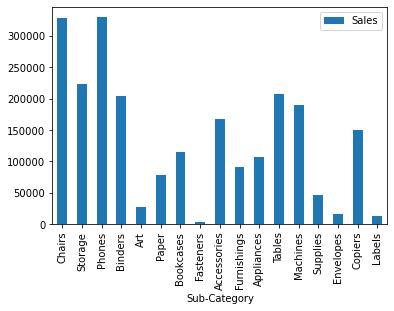

In [130]:
#Create bar plot
%matplotlib inline

Catforbar[['Sales']].plot(kind='bar')

*According to the bar plot, Chairs have the highest number of sales while Fasteners have the lowest number of sales.*

- Total Sales per State (bar plot)

In [131]:
#reset index
emporderData = emporderData.reset_index(drop=True)
emporderData.head(1)

,Sub-Category,Product Name,Customer Name,Year of Order Date,State,level_0,index,EmployeeID,LastName,FirstName,...,Postal Code,Region,Product ID,Category,Sales,Quantity,Discount,Profit,Unnamed: 22,Shipping Time
0,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Claire Gute,2017,Kentucky,0,0,1,Davolio,Nancy,...,42420.0,South,FUR-CH-10000454,Furniture,731.94,3,0.0,219.582,NaN,3


In [132]:
#Set index to state
Stateforbar = emporderData.set_index('State')
Stateforbar = Stateforbar.sum(level='State')
Stateforbar

,Year of Order Date,level_0,index,EmployeeID,Extension,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Unnamed: 22,Shipping Time
State,,,,,,,,,,,,,
Kentucky,280318,642507,642507,634,395183,698921,5725336.0,36591.7500,523,0.00,11199.6966,0.0,536
Wisconsin,221858,516116,516116,505,315880,570981,5899704.0,32114.6100,463,0.00,8401.8004,0.0,439
California,4035453,9959758,9959758,9703,5468657,10137449,184382639.0,457687.6315,7667,145.60,76381.3871,0.0,7738
Nebraska,76637,179039,179039,174,119547,205384,2588614.0,7464.9300,136,0.00,2037.0942,0.0,133
Pennsylvania,1183809,2926470,2926470,2868,1652234,2768523,11190565.0,116511.9140,2153,192.90,-15559.9603,0.0,2277
Texas,1986425,5086689,5086689,4928,2604054,5085541,75747693.0,170188.0458,3724,364.64,-25729.3563,0.0,3872
Indiana,300524,733945,733945,719,440513,728770,6991602.0,53555.3600,578,0.00,18382.9363,0.0,646
New York,2274878,5664879,5664879,5543,3007767,5452096,11835721.0,310876.2710,4224,62.40,74038.5486,0.0,4575
Arizona,451719,1120150,1120150,1101,610899,1019876,19102126.0,35282.0010,862,68.00,-3427.9246,0.0,912


<AxesSubplot:xlabel='State'>

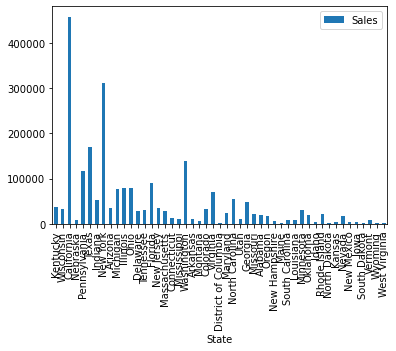

In [134]:
#Create bar plot
%matplotlib inline

Stateforbar[['Sales']].plot(kind='bar')

*According to the bar plot, the state with the highest number of total sales is California by a large margin. The second largest sales are in New York.*

- Quantity (histogram)

<AxesSubplot:ylabel='Frequency'>

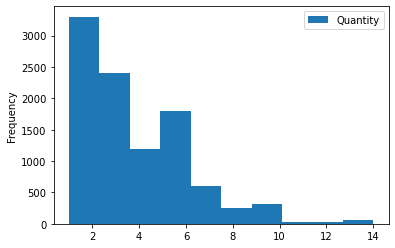

In [135]:
%matplotlib inline

emporderData[['Quantity']].plot.hist(bins=10)

*There appear to be a siginificantly larger number of orders with smaller quantities purchased.*

- Change in total sales over time

In [145]:
#Create new column for month_year from Order Date
emporderData['Year_Month'] = pd.to_datetime(emporderData['Order Date']).dt.to_period('M')
emporderData.head(1)

,Sub-Category,Product Name,Customer Name,Year of Order Date,State,level_0,index,EmployeeID,LastName,FirstName,...,Region,Product ID,Category,Sales,Quantity,Discount,Profit,Unnamed: 22,Shipping Time,Year_Month
0,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Claire Gute,2017,Kentucky,0,0,1,Davolio,Nancy,...,South,FUR-CH-10000454,Furniture,731.94,3,0.0,219.582,NaN,3,2017-11


In [153]:
#Create SalesoverTime with time index
SalesoverTime = emporderData.set_index('Year_Month')
SalesoverTime = SalesoverTime.sum(level='Year_Month').sort_values(by=['Year_Month'], ascending=False)
SalesoverTime

,Year of Order Date,level_0,index,EmployeeID,Extension,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Unnamed: 22,Shipping Time
Year_Month,,,,,,,,,,,,,
2018-12,932316,2296073,2296073,2249,1272546,2250814,25588725.0,83829.3188,1723,67.72,8483.3468,0.0,1867
2018-11,926262,2363865,2363865,2299,1210493,2300116,25327074.0,118447.8250,1840,73.89,9690.1037,0.0,1747
2018-10,601364,1439902,1439902,1414,861680,1412854,16610947.0,77776.9232,1133,51.92,9275.2755,0.0,1183
2018-09,926262,2307176,2307176,2245,1230255,2358436,25163354.0,87866.6520,1660,67.65,10991.5556,0.0,1693
2018-08,439924,1047638,1047638,1022,605281,1141105,13521406.0,63120.8880,884,31.30,9040.9557,0.0,880
2018-07,456068,1147247,1147247,1110,635641,1183701,11905252.0,45264.4160,840,31.65,6952.6212,0.0,938
2018-06,494410,1280575,1280575,1246,641451,1171681,13582238.0,52981.7257,931,42.12,8223.3357,0.0,995
2018-05,488356,1242593,1242593,1193,632904,1346912,14187724.0,44261.1102,887,36.89,6342.5828,0.0,903
2018-04,409654,1008789,1008789,994,520436,948011,10137966.0,36521.5361,733,39.47,933.2900,0.0,775


<AxesSubplot:title={'center':'Change in Sales over Time'}, xlabel='Year_Month'>

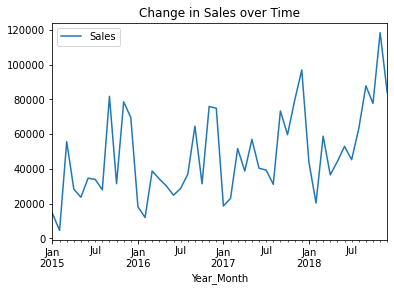

In [154]:
#Plot change in sales over time
%matplotlib inline

SalesoverTime[['Sales']].plot(title="Change in Sales over Time", legend = True)

*Sales tend to decrease significantly in the winter months, but have been seeing higher peaks every consecutive year.*

- Change in total sales over time for the state of California

In [156]:
#Set index to Year_Month
CalSalesoverTime = emporderData.set_index('Year_Month')
CalSalesoverTime

,Sub-Category,Product Name,Customer Name,Year of Order Date,State,level_0,index,EmployeeID,LastName,FirstName,...,Postal Code,Region,Product ID,Category,Sales,Quantity,Discount,Profit,Unnamed: 22,Shipping Time
Year_Month,,,,,,,,,,,,,,,,,,,,,
2017-11,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Claire Gute,2017,Kentucky,0,0,1,Davolio,Nancy,...,42420.0,South,FUR-CH-10000454,Furniture,731.940,3,0.0,219.5820,NaN,3
2015-11,Storage,"Stur-D-Stor Shelving, Vertical 5-Shelf: 72""H x...",Pete Kriz,2015,Wisconsin,1,1,1,Davolio,Nancy,...,53711.0,Central,OFF-ST-10004186,Office Supplies,665.880,6,0.0,13.3176,NaN,7
2015-08,Phones,Cisco SPA 501G IP Phone,Zuschuss Donatelli,2015,California,2,2,1,Davolio,Nancy,...,94109.0,West,TEC-PH-10001949,Technology,213.480,3,0.2,16.0110,NaN,5
2015-08,Binders,"Wilson Jones Hanging View Binder, White, 1""",Zuschuss Donatelli,2015,California,3,3,1,Davolio,Nancy,...,94109.0,West,OFF-BI-10002215,Office Supplies,22.720,4,0.2,7.3840,NaN,5
2017-12,Art,Newell 318,Ken Black,2017,Nebraska,4,4,1,Davolio,Nancy,...,68025.0,Central,OFF-AR-10000246,Office Supplies,19.460,7,0.0,5.0596,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-11,Chairs,Global Commerce Series High-Back Swivel/Tilt C...,Brosina Hoffman,2015,Illinois,9989,9989,9,Dodsworth,Anne,...,60653.0,Central,FUR-CH-10003379,Furniture,797.944,4,0.3,-56.9960,NaN,4
2016-03,Appliances,Disposable Triple-Filter Dust Bags,Suzanne McNair,2016,New York,9990,9990,9,Dodsworth,Anne,...,10009.0,East,OFF-AP-10000595,Office Supplies,13.110,3,0.0,3.4086,NaN,2
2015-11,Binders,Acco Economy Flexible Poly Round Ring Binder,Erin Ashbrook,2015,Ohio,9991,9991,9,Dodsworth,Anne,...,45040.0,East,OFF-BI-10000494,Office Supplies,3.132,2,0.7,-2.6100,NaN,2


In [158]:
#Restrict to State of California
CalSalesoverTime = CalSalesoverTime[CalSalesoverTime['State'] == 'California'].sort_values(by=['Year_Month'], ascending=False)
CalSalesoverTime

,Sub-Category,Product Name,Customer Name,Year of Order Date,State,level_0,index,EmployeeID,LastName,FirstName,...,Postal Code,Region,Product ID,Category,Sales,Quantity,Discount,Profit,Unnamed: 22,Shipping Time
Year_Month,,,,,,,,,,,,,,,,,,,,,
2018-12,Art,Newell 335,Tonja Turnell,2018,California,4273,4273,4,Peacock,Margaret,...,94110.0,West,OFF-AR-10002578,Office Supplies,5.760,2,0.00,1.6704,NaN,6
2018-12,Binders,Vinyl Sectional Post Binders,Denise Monton,2018,California,7596,7596,7,King,Robert,...,94109.0,West,OFF-BI-10001670,Office Supplies,90.480,3,0.20,33.9300,NaN,6
2018-12,Furnishings,"Tenex ""The Solids"" Textured Chair Mats",Max Ludwig,2018,California,6557,6557,6,Suyama,Michael,...,95207.0,West,FUR-FU-10003394,Furniture,629.640,9,0.00,107.0388,NaN,6
2018-12,Binders,Satellite Sectional Post Binders,Alice McCarthy,2018,California,2520,2520,3,Leverling,Janet,...,90032.0,West,OFF-BI-10000632,Office Supplies,69.456,2,0.20,22.5732,NaN,1
2018-12,Chairs,"Global Deluxe Stacking Chair, Gray",Andy Yotov,2018,California,2589,2589,3,Leverling,Janet,...,92054.0,West,FUR-CH-10002774,Furniture,81.568,2,0.20,9.1764,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-01,Bookcases,"O'Sullivan Elevations Bookcase, Cherry Finish",Brian Dahlen,2015,California,5033,5033,5,Buchanan,Steven,...,94109.0,West,FUR-BO-10003034,Furniture,333.999,3,0.15,3.9294,NaN,5
2015-01,Paper,Xerox 225,Lycoris Saunders,2015,California,2855,2855,3,Leverling,Janet,...,90049.0,West,OFF-PA-10002005,Office Supplies,19.440,3,0.00,9.3312,NaN,2
2015-01,Art,4009 Highlighters by Sanford,Brian Dahlen,2015,California,2819,2819,3,Leverling,Janet,...,94109.0,West,OFF-AR-10003514,Office Supplies,19.900,5,0.00,6.5670,NaN,5


In [160]:
#Group to months
CalSalesoverTime = CalSalesoverTime.sum(level='Year_Month').sort_values(by=['Year_Month'], ascending=False)
CalSalesoverTime

,Year of Order Date,level_0,index,EmployeeID,Extension,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Unnamed: 22,Shipping Time
Year_Month,,,,,,,,,,,,,
2018-12,195746,473799,473799,474,246592,388176,8960556.0,19318.0230,373,7.25,3858.9401,0.0,363
2018-11,161440,364294,364294,360,225109,404016,7405243.0,13580.9510,326,4.75,1921.5684,0.0,297
2018-10,125116,293676,293676,289,175768,298367,5791375.0,15776.3010,262,5.70,3780.5085,0.0,255
2018-09,177584,448218,448218,430,241477,507453,8096507.0,18866.8520,331,6.75,3675.8825,0.0,319
2018-08,117044,307403,307403,294,138138,320838,5397878.0,14534.3220,211,4.60,3386.8076,0.0,209
2018-07,80720,196807,196807,188,124302,243107,3686945.0,12923.8590,159,2.95,2930.5498,0.0,158
2018-06,74666,185023,185023,183,113717,153483,3380331.0,9086.9655,156,2.40,1539.3122,0.0,130
2018-05,82738,228708,228708,217,105518,236757,3786667.0,10157.3560,165,2.20,2266.6386,0.0,167
2018-04,76684,199899,199899,193,87669,201449,3490955.0,8784.2060,160,2.05,1150.6062,0.0,151


<AxesSubplot:title={'center':'Change in Sales over Time in California'}, xlabel='Year_Month'>

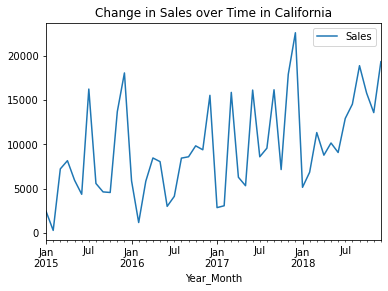

In [161]:
#Plot change in sales over time in Califorina
%matplotlib inline

CalSalesoverTime[['Sales']].plot(title="Change in Sales over Time in California", legend = True)

*The Sales seem to have peaked at the end of 2017, though the end of the plot seems to follow the increasing number of sales in the same way as the plot of the overall data.*

- Change in total sales over time for the state of Florida

In [164]:
#Create FloSalesoverTime with proper index
FloSalesoverTime = emporderData.set_index('Year_Month')
#Restrict to Florida
FloSalesoverTime = FloSalesoverTime[FloSalesoverTime['State'] == 'Florida'].sort_values(by=['Year_Month'], ascending=False)
FloSalesoverTime

,Sub-Category,Product Name,Customer Name,Year of Order Date,State,level_0,index,EmployeeID,LastName,FirstName,...,Postal Code,Region,Product ID,Category,Sales,Quantity,Discount,Profit,Unnamed: 22,Shipping Time
Year_Month,,,,,,,,,,,,,,,,,,,,,
2018-12,Machines,Lexmark 20R1285 X6650 Wireless All-in-One Printer,Jennifer Halladay,2018,Florida,9955,9955,9,Dodsworth,Anne,...,33012.0,South,TEC-MA-10004626,Technology,120.000,2,0.50,-7.2000,NaN,3
2018-12,Phones,Motorola HK250 Universal Bluetooth Headset,Darrin Van Huff,2018,Florida,6394,6394,6,Suyama,Michael,...,32216.0,South,TEC-PH-10003555,Technology,73.568,4,0.20,-16.5528,NaN,6
2018-12,Tables,BoxOffice By Design Rectangular and Half-Moon ...,Darrin Van Huff,2018,Florida,7917,7917,7,King,Robert,...,32216.0,South,FUR-TA-10004289,Furniture,721.875,6,0.45,-420.0000,NaN,6
2018-12,Accessories,Kensington Orbit Wireless Mobile Trackball for...,Natalie DeCherney,2018,Florida,3742,3742,4,Peacock,Margaret,...,32216.0,South,TEC-AC-10001990,Technology,47.992,1,0.20,7.1988,NaN,2
2018-12,Chairs,"Global Geo Office Task Chair, Gray",Darrin Van Huff,2018,Florida,4139,4139,4,Peacock,Margaret,...,32216.0,South,FUR-CH-10000225,Furniture,64.784,1,0.20,-12.1470,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03,Binders,"Avery Flip-Chart Easel Binder, Black",Matt Connell,2015,Florida,1814,1814,2,Fuller,Andrew,...,33801.0,South,OFF-BI-10001196,Office Supplies,33.570,5,0.70,-25.7370,NaN,2
2015-03,Furnishings,Eldon Wave Desk Accessories,Matt Connell,2015,Florida,1815,1815,2,Fuller,Andrew,...,33801.0,South,FUR-FU-10003981,Furniture,4.992,3,0.20,1.3728,NaN,2
2015-02,Binders,Surelock Post Binders,Eric Barreto,2015,Florida,4356,4356,4,Peacock,Margaret,...,33710.0,South,OFF-BI-10000666,Office Supplies,18.336,2,0.70,-12.2240,NaN,7


In [165]:
#Group to months
FloSalesoverTime = FloSalesoverTime.sum(level='Year_Month').sort_values(by=['Year_Month'], ascending=False)
FloSalesoverTime

,Year of Order Date,level_0,index,EmployeeID,Extension,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Unnamed: 22,Shipping Time
Year_Month,,,,,,,,,,,,,
2018-12,22198,57805,57805,56,30245,60216,359336.0,1183.3510,32,3.25,-462.1899,0.0,45
2018-11,44396,118697,118697,110,63719,153749,724771.0,5236.9660,80,5.90,578.0899,0.0,100
2018-10,26234,68531,68531,65,31243,73817,424340.0,1773.6470,43,3.10,190.5599,0.0,49
2018-09,32288,79000,79000,78,37622,73860,527458.0,1976.1520,45,4.20,164.4151,0.0,56
2018-08,16144,29134,29134,30,30449,36321,262920.0,4628.3120,37,1.60,367.6770,0.0,26
2018-07,8072,22499,22499,22,7738,16382,132283.0,379.6000,8,0.80,32.1066,0.0,13
2018-06,30270,59318,59318,59,46957,86790,495675.0,2826.5380,52,3.50,144.6306,0.0,85
2018-05,10090,31500,31500,28,13070,43379,162778.0,4059.4700,16,1.25,-471.9508,0.0,17
2018-04,52468,119094,119094,121,66211,105269,854572.0,3706.4315,79,8.20,-226.8308,0.0,104


<AxesSubplot:title={'center':'Change in Sales over Time in Florida'}, xlabel='Year_Month'>

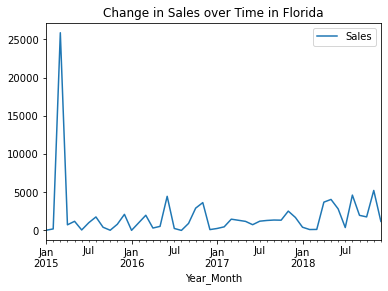

In [166]:
#Plot change in sales over time for Florida
%matplotlib inline

FloSalesoverTime[['Sales']].plot(title="Change in Sales over Time in Florida", legend = True)

*For Florida, sales seemed to have peaked in early 2015 then drastically decreased, staying relatively stagnant at low levels with minimal growth throughout the timeline covered by the data.*